In [1]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

Logistic Regression
===============

This is the demo for Logistic Regression




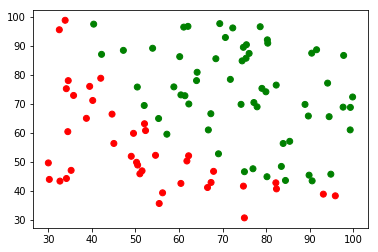

In [2]:
data = np.loadtxt("Logistic_Regression.txt", delimiter=',')
colors = colors = ['red' if i == 0 else 'green' for i in data[:, 2]]

plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.show()

In [8]:


def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def pad(x):
    return np.hstack((np.ones((x.shape[0], 1), dtype = x.dtype), x))

def update(theta, alpha, grad):
    return theta - alpha * grad

def h(theta, x):
    #YOUR CODE HERE
    return sigmoid(np.dot(theta.T, x))
    pass

def compute_gradient(theta, x, y):
    #YOUR CODE HERE
    yhat = h(theta, x)
#     print("Yhat shape : {}, yshape : {}".format(yhat.shape, y.shape))
    # Broadcast to perform multiply elment wise
#     dw = np.sum(x * (y - yhat), axis=1, keepdims=True) / x.shape[0]
    dw = np.dot(x, (yhat - y).T) / x.shape[0]
    assert(dw.shape == theta.shape)
    return dw
    pass

def predict(theta, x):
    #YOUR CODE HERE
    pass

x = pad(data[:, 0:2]).T
y = data[:, 2].reshape((1, x.shape[1]))

alpha = 0.0002/len(x)
tolerance = 1e-5
error = 1

theta = np.array([0.0, 0.0, 0.0]).reshape((x.shape[0], 1))
iteration = 0;

while error > tolerance:
    grad = compute_gradient(theta, x, y)
    
    theta = update(theta, alpha, grad)
    
    error = alpha * np.amax(np.absolute(grad))
    iteration = iteration + 1
    if iteration % 100000 == 0:
        print("Error ", error)

print(theta)

Error  0.02923902019597214
Error  1.7826753547757933e-05
Error  1.3599334811062016e-05
Error  1.0915120771724057e-05
[[-16.36603648]
 [  0.13599506]
 [  0.13031257]]


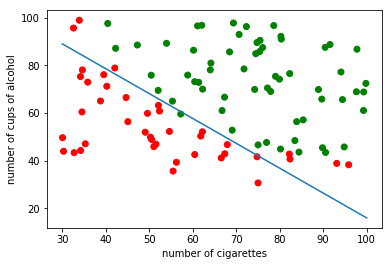

In [10]:
import math
def compute_y(theta, x):
    #YOUR CODE HERE
    return (math.log(0.5) - theta[0] - theta[1] * x) / theta[2]
    pass

line_x = np.array([30, 100])

plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.plot(line_x, compute_y(theta, line_x), '-')
plt.xlabel('number of cigarettes')
plt.ylabel('number of cups of alcohol')

plt.show()